In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\lucky\OneDrive\Desktop\Titanic+Data+Set (1).csv")

# EDA

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# visualization

<Axes: xlabel='Sex', ylabel='count'>

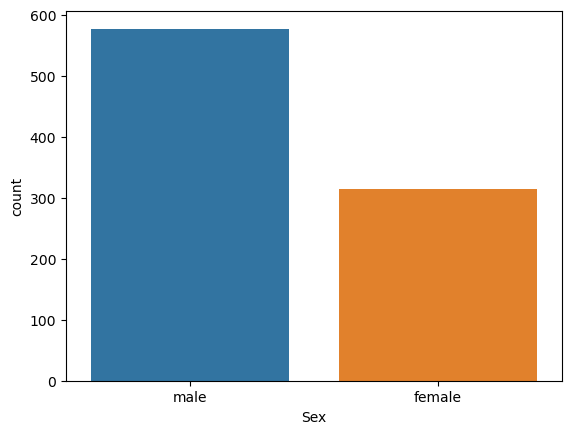

In [10]:
sns.countplot(data=df,x='Sex')

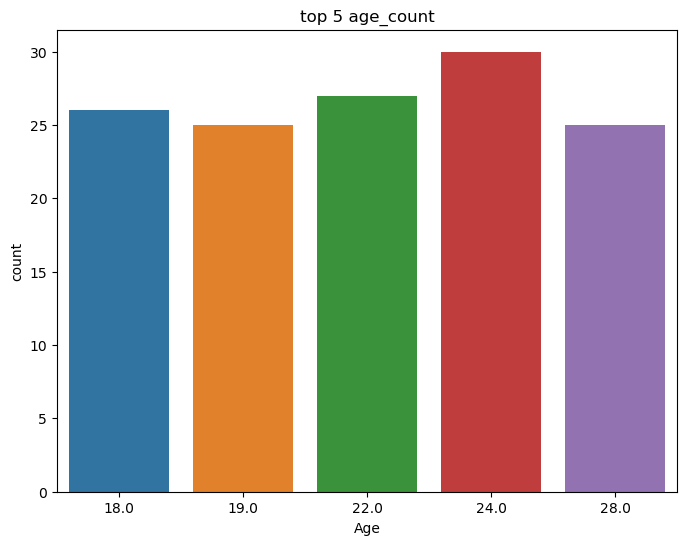

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64


In [11]:
age_counts=df.Age.value_counts().head()
plt.figure(figsize=(8,6))
sns.barplot(data=df,x=age_counts.index,y=age_counts.values)
plt.title('top 5 age_count')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
print(age_counts)

In [12]:
pclass_counts=df.Pclass.value_counts(normalize=True)
pclass_counts

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

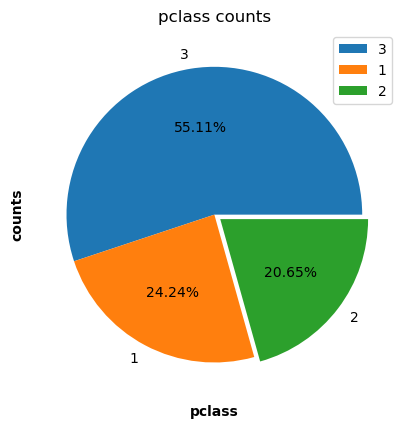

In [13]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0,0.05])
plt.title('pclass counts')
plt.xlabel('pclass',weight='bold')
plt.ylabel('counts',weight='bold')
plt.legend(labels = pclass_counts.index)
plt.show()

In [14]:
sibsp_counts=df.SibSp.value_counts()
sibsp_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

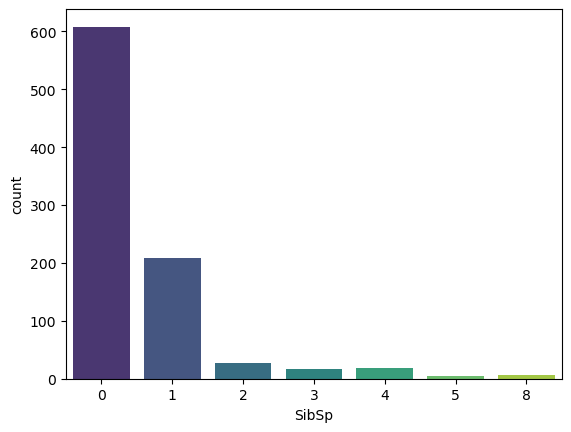

In [15]:
sns.countplot(data=df,x='SibSp',palette='viridis')

In [16]:
embarked_counts=df.Embarked.value_counts()
embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

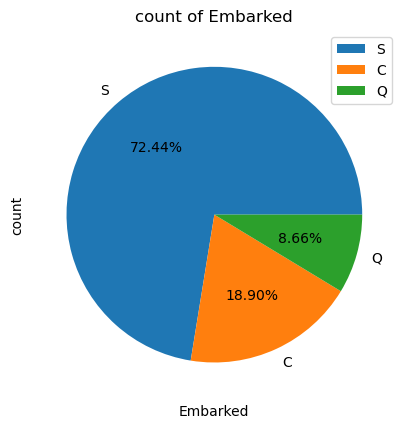

In [17]:
plt.pie(df['Embarked'].value_counts(),autopct='%.2f%%',labels=['S', 'C', 'Q'])
plt.title('count of Embarked')
plt.xlabel('Embarked')
plt.ylabel('count')
plt.legend(labels=embarked_counts.index)
plt.show()

In [18]:
survived_counts=df.Survived.value_counts()
survived_counts

0    549
1    342
Name: Survived, dtype: int64

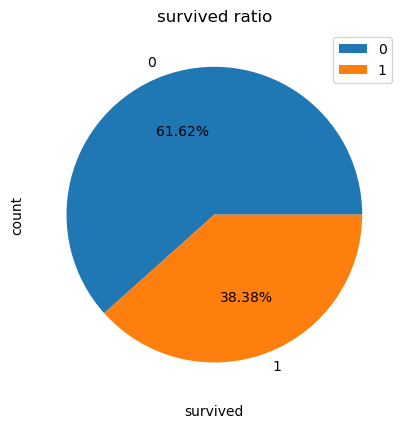

In [19]:
plt.pie(df['Survived'].value_counts(),autopct='%.2f%%',labels=[0, 1])
plt.title('survived ratio')
plt.xlabel('survived')
plt.ylabel('count')
plt.legend(survived_counts.index)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

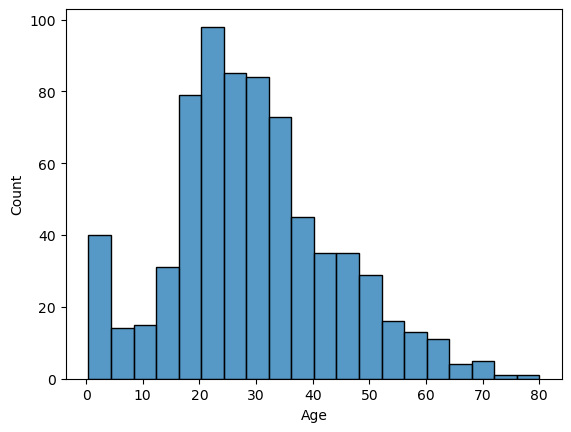

In [20]:
sns.histplot(data=df,x='Age',)

The distribution of the 'Age' column is right-skewed or positively skewed, it means that the majority of the data points tend to cluster towards the younger ages, with a tail extending towards the older ages. 

## Visualizing based on gender, whether individuals survived or not

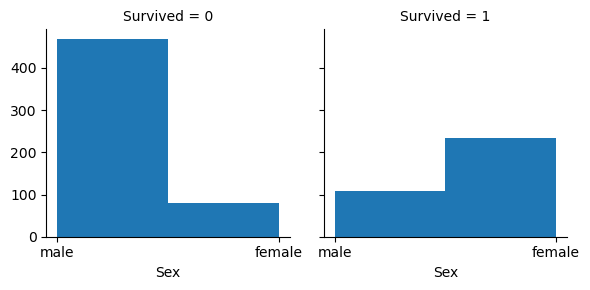

In [21]:
gender=sns.FacetGrid(df,col='Survived')  #This means there will be separate plots for each unique value 
                                                # in the 'Survived' column.

gender.map(plt.hist,'Sex',bins=2)

 Higher number of males did not survive compared to females.

### Visualizing the relationship between age and survival status of individuals.

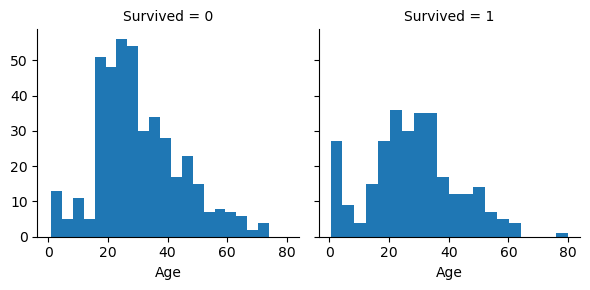

In [22]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)


The majority of individuals within the younger age group, specifically those between 18 and 30 years old, did not survive.

### Visualizing the relationship between SibSp and survival status of individuals.

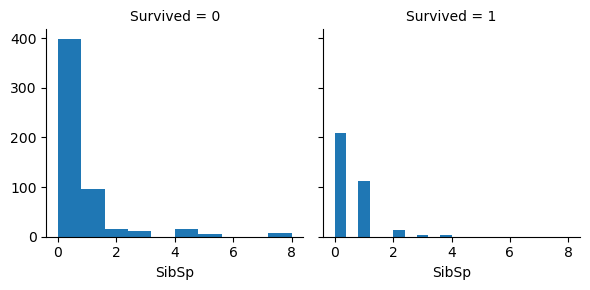

In [23]:
sibsp=sns.FacetGrid(df,col='Survived')
sibsp.map(plt.hist,'SibSp',bins=10)

Passengers who did not have any siblings or spouses accompanying them aboard were less likely to survive 

### visulize pclass is survived or not

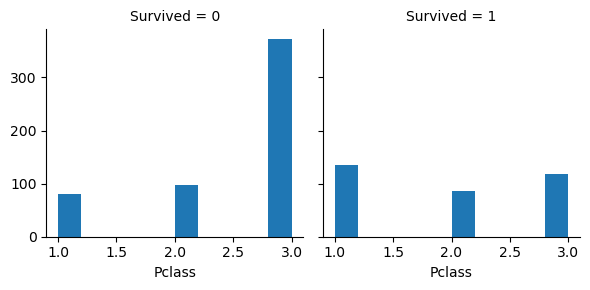

In [24]:
pclass=sns.FacetGrid(df,col='Survived')

pclass.map(plt.hist,'Pclass')

Passengers belonging to the third class (Pclass 3) had a lower survival rate in comparison to those in the first and second class (Pclass 1 and 2)

### visulize Parch is survived or notParch

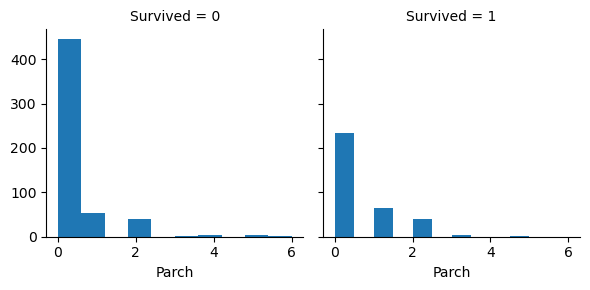

In [25]:
pclass=sns.FacetGrid(df,col='Survived')
pclass.map(plt.hist,'Parch')

Passengers with a 'Parch' value of 0 (indicating no parents or children aboard) had a lower likelihood of survival compared to those who were accompanied by at least one parent or child

# Data preprocessing

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'cabin' column have large number of dataset, so we can drop that column entirely if it's not crucial to our analysis,
for the 'Embarked' column we can impute missing values by most frequent values.

In [27]:
df.Sex.replace({'male':1,'female': 0},inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# filling missing values for 'Embarked' column by imputing the mode
df['Embarked'].fillna(df.Embarked.mode()[0],inplace=True)

In [30]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [31]:
df.Embarked.replace({'S':1,'C':2,'Q':3},inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [33]:
df.corr()

C:\Users\lucky\AppData\Local\Temp\ipykernel_19912\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000


C:\Users\lucky\AppData\Local\Temp\ipykernel_19912\471022381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='summer')


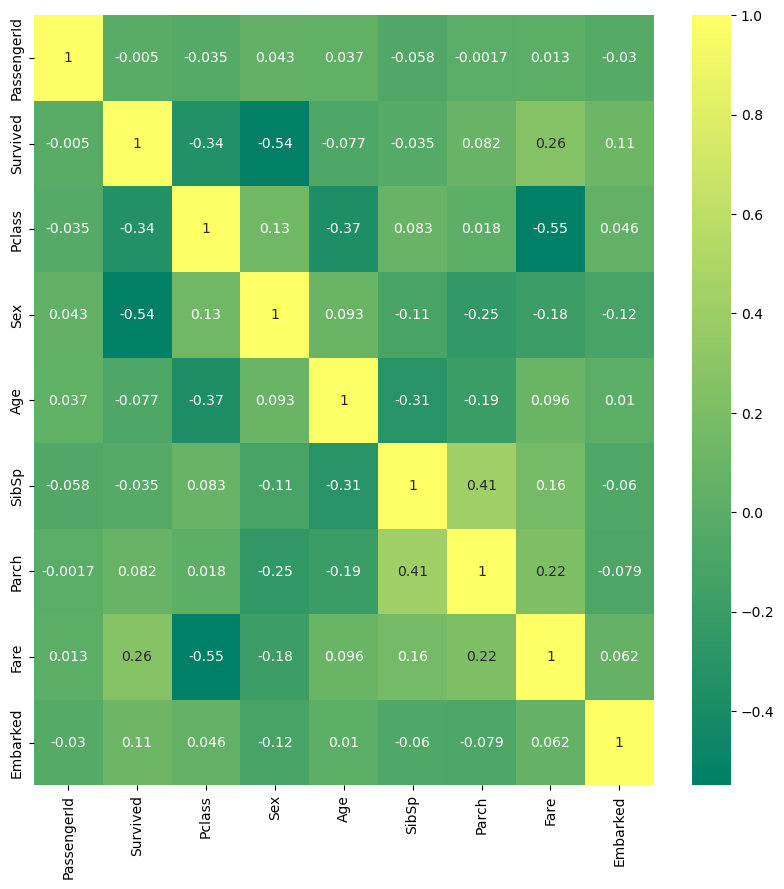

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

In [35]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [36]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
df.Age.median()

28.0

<Axes: xlabel='Age'>

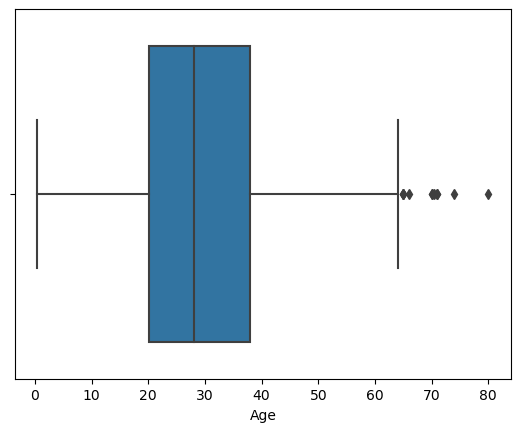

In [38]:
sns.boxplot(data=df,x='Age')

In [39]:
df.Age.fillna(df.Age.median(),inplace=True)

In [40]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

###  Define features and target

In [52]:
y=df[['Survived']] #Represents the target variable (dependent variable) of the training dataset, containing the corresponding labels or classes.

x=df.drop(columns=['Survived'])    # Represents the features (independent variables) of the training dataset.

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

### Logistic regression

In [53]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(x_train,y_train)
# Initialize logistic regression with L2 regularization (Ridge)
#max_iter : Sets the maximum number of iterations for the optimization algorithm to converge
#solver lbfgs : The "lbfgs" solver is efficient for handling large datasets and is suitable for multinomial loss problems.

C:\Users\lucky\.conda\py\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [44]:
lg.score(x_train,y_train)

0.8154093097913323

In [45]:
y_pred=lg.predict(x_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.7761194029850746


[[130  23]
 [ 37  78]]


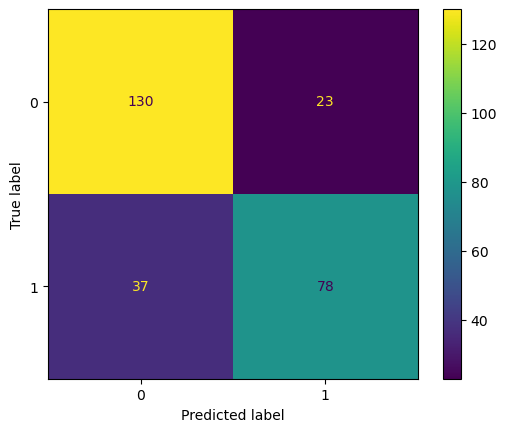

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.77      0.68      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

